# pyfesom2 xarray interface

## pyfesom2 comes with remote fesom2 dataset examples
<p style="color:gray;font-size:18px;">These datasets that are loaded on demand</p>

In [1]:
from pyfesom2.datasets import LCORE, A01
lcore_dataset = LCORE.load()
lcore_dataset

osgeo is not installed, conversion to Geo formats like Geotiff (fesom2GeoFormat) will not work.


<xarray.Dataset>
Dimensions:  (nod2: 126858, nz1: 47, time: 144)
Coordinates:
    lat      (nod2) float64 dask.array<chunksize=(126858,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(126858,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1959-12-31T23:15:00
Dimensions without coordinates: nod2
Data variables:
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    salt     (time, nod2, nz1) float32 dask.array<chunksize=(1, 126858, 47), meta=np.ndarray>
    a_ice    (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    ssh      (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
    sst      (time, nod2) float32 dask.array<chunksize=(1, 126858), meta=np.ndarray>
Attributes:
    Dataset URL:  https://swiftbrowser.dkrz.de/objects/FESOM2_data/LCORE

## Local datasets can be loaded as xarray datasets using open_dataset

In [2]:
from pyfesom2 import open_dataset
pi_grid = open_dataset("../tests/data/pi-results/*.nc", mesh_path="../tests/data/pi-grid/")
pi_grid

/home/suvarchal/AWI/pyfesom2_temp/pyfesom2/tests/data/pi-grid/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /home/suvarchal/AWI/pyfesom2_temp/pyfesom2/tests/data/pi-grid/pickle_mesh_py3_fesom2


<xarray.Dataset>
Dimensions:  (elem: 5839, nod2: 3140, nz: 48, nz1: 47, time: 3)
Coordinates:
  * nz       (nz) float64 0.0 -5.0 -10.0 -20.0 ... -5.65e+03 -6e+03 -6.25e+03
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * time     (time) datetime64[ns] 1948-12-30T23:15:00 ... 1949-12-31T23:20:00
    lon      (nod2) float64 -60.6 -60.73 -62.15 -60.71 ... 127.2 122.0 124.5
    lat      (nod2) float64 74.28 73.91 74.05 74.63 ... -66.25 -66.73 -66.46
Dimensions without coordinates: elem, nod2
Data variables:
    a_ice    (time, nod2) float32 dask.array<chunksize=(2, 3140), meta=np.ndarray>
    m_ice    (time, nod2) float32 dask.array<chunksize=(3, 3140), meta=np.ndarray>
    temp     (time, nod2, nz1) float32 dask.array<chunksize=(2, 3140, 47), meta=np.ndarray>
    u        (time, elem, nz1) float32 dask.array<chunksize=(2, 5839, 47), meta=np.ndarray>
    v        (time, elem, nz1) float32 dask.array<chunksize=(2, 5839, 47), meta=np.ndarray>
    w        (time, nod2, nz) float32 dask.array<chunksize=(2, 3140, 48), meta=np.ndarray>

## Importing pyfesom2 adds additional functionality to xarray datasets (accessors) to help working with unstructured grids.

<p style="color:gray;font-size:18px;">These methods add missing functionality in xarray to deal with unstructured grids: e.g, selection, plotting.</p>

In [3]:
import pyfesom2 

### Point selection

In [4]:
lcore_dataset.salt.pyfesom2.sel(time="1948-01-31", lat=0, lon=0, method='nearest')

<xarray.DataArray 'salt' (time: 1, nod2: 1, nz1: 47)>
dask.array<getitem, shape=(1, 1, 47), dtype=float32, chunksize=(1, 1, 47), chunktype=numpy.ndarray>
Coordinates:
    lat      (nod2) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    lon      (nod2) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * time     (time) datetime64[ns] 1948-01-31T23:15:00
Dimensions without coordinates: nod2
Attributes:
    description:  salinity
    units:        psu

### Bounding box selection or shapely Polygon

In [5]:
lcore_dataset.temp.pyfesom2.sel(region=[60,0,110,50]) # region can be West, South, East, North or a Polygon of arbitary shape

<xarray.DataArray 'temp' (time: 144, nod2: 2921, nz1: 47)>
dask.array<getitem, shape=(144, 2921, 47), dtype=float32, chunksize=(1, 2921, 47), chunktype=numpy.ndarray>
Coordinates:
  * nz1      (nz1) float64 -2.5 -7.5 -15.0 ... -5.525e+03 -5.825e+03 -6.125e+03
  * time     (time) datetime64[ns] 1948-01-31T23:15:00 ... 1959-12-31T23:15:00
  * nod2     (nod2) MultiIndex
  - lon      (nod2) float64 60.01 60.01 60.02 60.04 ... 110.0 110.0 110.0 110.0
  - lat      (nod2) float64 4.306 20.99 1.327 6.597 ... 6.187 18.68 8.454 4.861
Attributes:
    description:  temperature
    units:        C

### When appropriate (non spatial plots) regular xarray ploting can be used

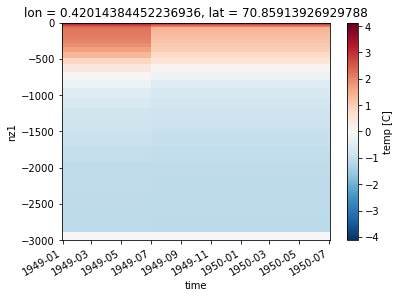

In [6]:
pi_grid.temp.pyfesom2.sel(lat=70, lon=0, method='nearest').plot(y='nz1', ylim=(-3000,0))

In [7]:
### pi_grid.a_ice.pyfesom2.plot_map() # for spatial plot 